In [37]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import pandas as pd
import os

csv_path = os.path.join(os.getcwd(), 'code_gpus', 'twitter-elon-tesla-bert.csv')
df = pd.read_csv(csv_path)
print(df.columns)
selected_columns = df[['Cleaned_Tweets', 'sentiment_score_bert']]

Index(['User', 'Username', 'UTC Date', 'post', 'Binders', 'Permalink',
       'reposts', 'Likes count', 'Impressions', 'Quotes', 'Replies',
       'Bookmarks', 'post value', 'Cleaned_Tweets', 'sentiment_score_bert'],
      dtype='object')


In [39]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
df['Subjectivity'] = df['post'].apply(getSubjectivity)


def categorize_sentiment(value):
    if value in [1, 2]:
        return 'Negative'
    elif value == 3:
        return 'Neutral'
    else:
        return 'Positive'
df['Sentiment'] = df['sentiment_score_bert'].apply(categorize_sentiment)
df.head()
    

,User,Username,UTC Date,post,Binders,Permalink,reposts,Likes count,Impressions,Quotes,Replies,Bookmarks,post value,Cleaned_Tweets,sentiment_score_bert,Subjectivity,Sentiment
0,aHoy,@BrandonLeong3,2023-04-01 23:59:53,@Chrysto @elonmusk @Tesla Your burning passion...,NaN,https://www.twitter.com/user/status/1642315880...,0,0,1257,0,0,0,0.07,Your burning passion for tesla ….paid off in a...,5,0.0,Positive
1,victoria,@starveiRL,2023-04-01 23:59:46,i deleted that tweet cs i think an elon musk f...,NaN,https://www.twitter.com/user/status/1642315850...,0,0,22,0,0,0,0.00,i deleted that tweet cs i think an elon musk f...,1,0.0,Negative
2,Frances Caso,@frances_caso,2023-04-01 23:59:44,@elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...,NaN,https://www.twitter.com/user/status/1642315843...,0,1,8,0,0,0,0.00,ELON; THANK ~YOU FOR HAVING “Carlos Rodriguez...,5,0.0,Positive
3,DavidRowe ⧖ - #WATON,@DavidRoweWTL,2023-04-01 23:59:43,@GerberKawasaki @garyblack00 @farzyness @Tesla...,NaN,https://www.twitter.com/user/status/1642315838...,0,3,434,0,1,0,3.39,You aren't arguing that Tesla can't extend its...,3,0.5,Neutral
4,The Green Living Guy,@greenlivingguy,2023-04-01 23:59:37,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315816...,1,2,18,0,0,0,14.19,"CNBC Reports Tesla Installs Over 3,000 Solar R...",5,0.0,Positive


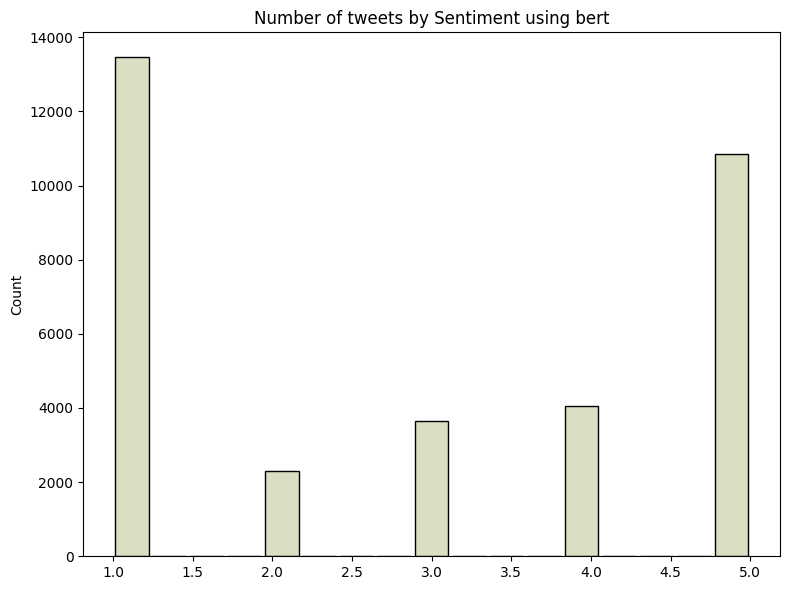

In [40]:
plt.figure(figsize = (8,6))

sns.histplot(df, x = 'sentiment_score_bert', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment using bert')

plt.tight_layout()

In [68]:
df['UTC Date'] = pd.to_datetime(df['UTC Date'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


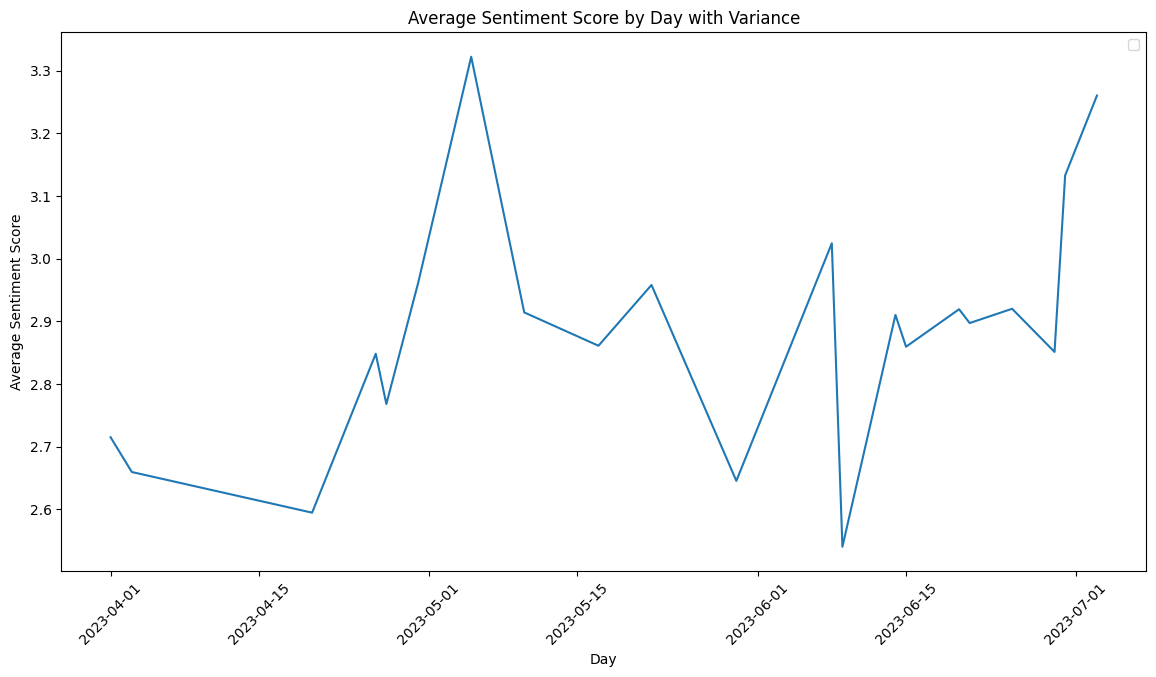

In [53]:
daily_sentiment_mean = df.groupby(df['UTC Date'].dt.date)['sentiment_score_bert'].mean().reset_index()
daily_sentiment_std = df.groupby(df['UTC Date'].dt.date)['sentiment_score_bert'].std().reset_index()
daily_sentiment_std.rename(columns={'sentiment_score_bert': 'sentiment_score_std'}, inplace=True)
daily_sentiment_mean.rename(columns={'sentiment_score_bert': 'sentiment_score_mean'}, inplace=True)

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment_mean, x='UTC Date', y='sentiment_score_mean')

dates = daily_sentiment_mean['UTC Date']
daily_means = daily_sentiment_mean['sentiment_score_mean']
daily_variance = daily_sentiment_std['sentiment_score_std']
# Fill the area between mean ± variance
#plt.fill_between(dates, daily_means - daily_variance, daily_means + daily_variance, alpha=0.2, label='Variance')

plt.title('Average Sentiment Score by Day with Variance')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

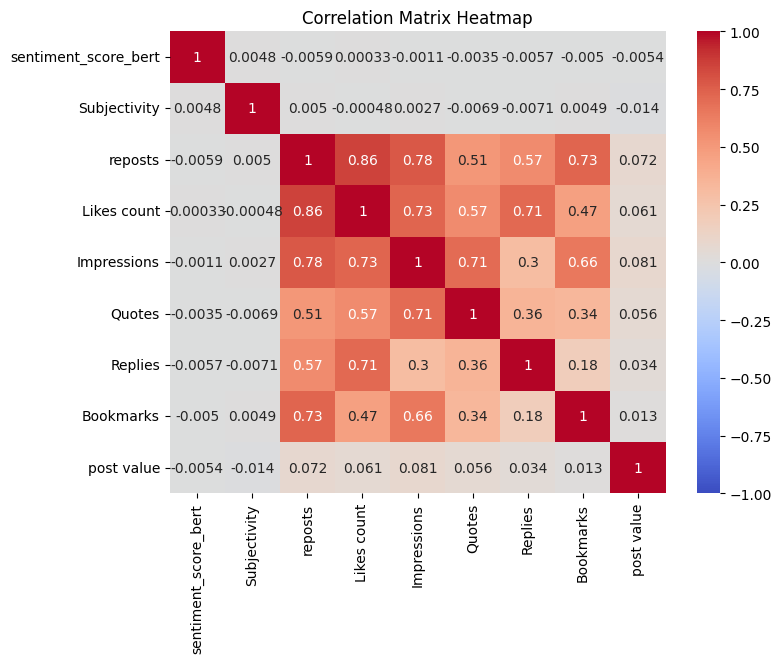

In [54]:
columns = ['sentiment_score_bert', 'Subjectivity', 'reposts', 'Likes count', 'Impressions', 'Quotes', 'Replies',
       'Bookmarks', 'post value']
correlation_matrix = df[columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='UTC Date', ylabel='sentiment_score_std'>

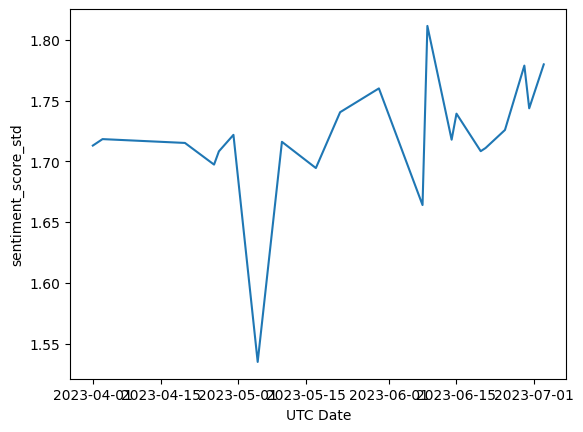

In [55]:
sns.lineplot(data=daily_sentiment_std, x='UTC Date', y='sentiment_score_std')

In [ ]:
daily_sentiment = pd.merge(daily_sentiment_mean, daily_sentiment_std, on='UTC Date', suffixes=('_mean', '_std'))
min_std_value = daily_sentiment['sentiment_score_std'].min()
min_std_date = daily_sentiment[daily_sentiment['sentiment_score_std'] == min_std_value]['UTC Date'].iloc[0]
max_mean_value = daily_sentiment['sentiment_score_mean'].max()
max_mean_date = daily_sentiment[daily_sentiment['sentiment_score_mean'] == max_mean_value]['UTC Date'].iloc[0]

print(f"The minimum standard deviation is {min_std_value} on {min_std_date}")
print(f"The maximum mean is {max_mean_value} on {max_mean_date}")

print(df[df['UTC Date'].dt.date==min_std_date].head())

The minimum standard deviation is 1.5348365486375268 on 2023-05-05
The maximum mean is 3.322420634920635 on 2023-05-05
                                        User       Username  \
9523  Ser Goldwyn 😴⚔ Dream Demon Defender ⚔😴      @BasicRez   
9524                        Tesla Patriot 🇺🇸  @TeslaPatriot   
9525                             Hosen Babul  @hosenbabul12   
9526                              Jose Rivas     @joserivsm   
9527                         Cruella de Vil🦴     @crxella__   

                UTC Date                                               post  \
9523 2023-05-05 22:58:59  @cerisbeech Twitter wouldn't like my last save...   
9524 2023-05-05 22:58:58  @Tesla Make room for child safety seats that a...   
9525 2023-05-05 22:58:56  Elon Musk has denied claims that he groped and...   
9526 2023-05-05 22:58:54  @Tesla You could start operations in Costa Ric...   
9527 2023-05-05 22:58:54  Come on Americans! We need 6 hour work days. 3...   

      Binders              

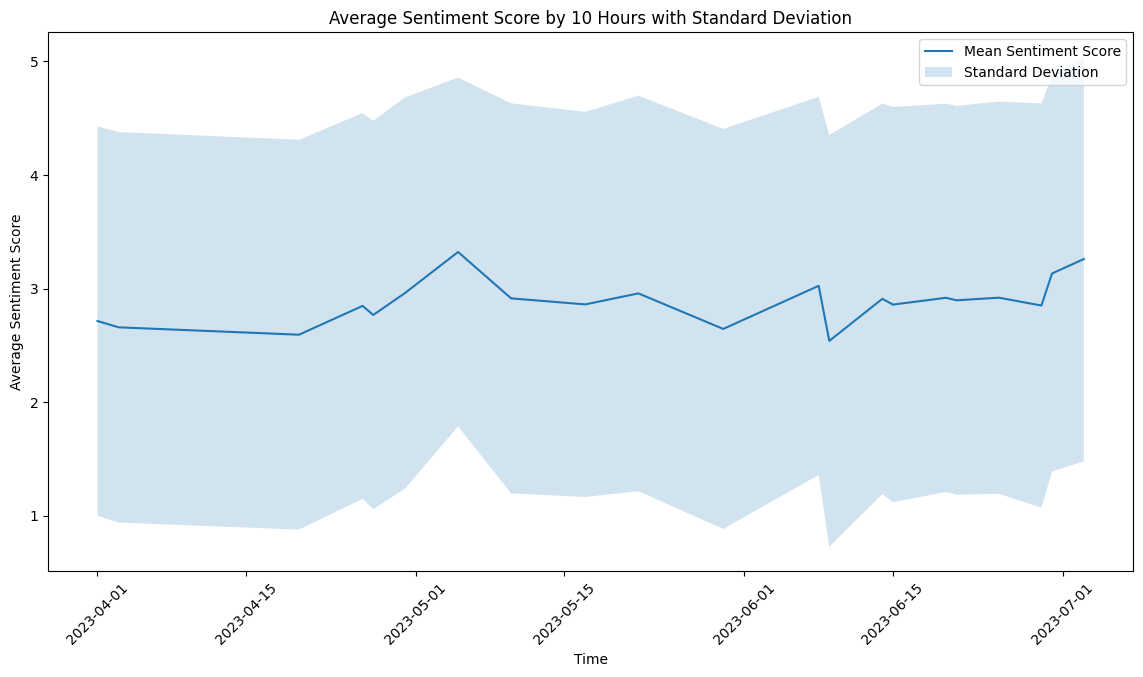

In [65]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment, x='UTC Date', y='sentiment_score_mean', label='Mean Sentiment Score')

# Fill the area between mean ± standard deviation
plt.fill_between(daily_sentiment['UTC Date'], 
                 daily_sentiment['sentiment_score_mean'] - daily_sentiment['sentiment_score_std'], 
                 daily_sentiment['sentiment_score_mean'] + daily_sentiment['sentiment_score_std'], 
                 alpha=0.2, label='Standard Deviation')

plt.title('Average Sentiment Score by 10 Hours with Standard Deviation')
plt.xlabel('Time')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [80]:
max_impressions = df[df['UTC Date'].dt.date==min_std_date]['Impressions'].max()
post_max_impressions = df[df['Impressions']==max_impressions]['post'].iloc[0]
print(max_impressions)
print(post_max_impressions)

778511
In 1 week, 1M people have signed up for @OpenAI's new chatbot, ChatGPT to experience what is being offered by the Elon Musk and Sam Altman founded company. 

Todd Price interviewed the ChatGPT bot about its plans for monetisation &amp; choice of blockchain:
